### Treść

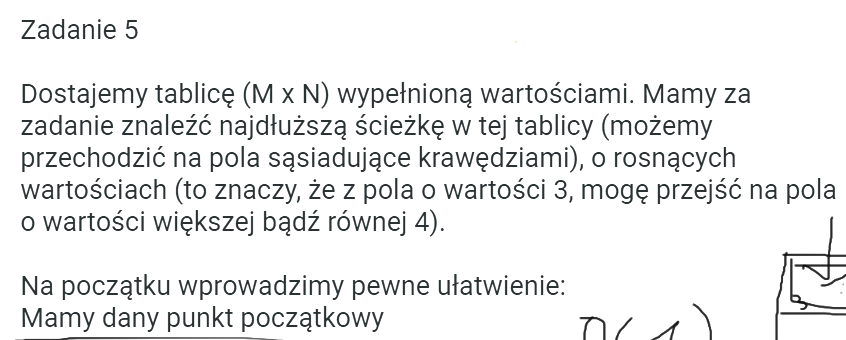

### Omówienie

Nie ma sensu robić algorytmu Bottom-up, bo tu dużo lepiej się sprawdzi Top-down. Stworzenie algorytmu Bottom-up jest dużo trudniejsze niż Top-down i nie mam na niego pomysłu 🤣.

Prykładowe ścieżki:
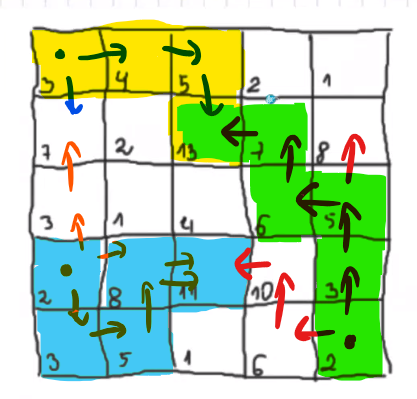

### Implementacja #1
#### Gdy dany jest punkt początkowy

#### Top-down

In [1]:
def longest_path(A: 'matrix of values', 
                 M: 'number of rows', 
                 N: 'number of columns', 
                 P0: 'beginning point'):
    F = [[1] * N for _ in range(M)]
    i0, j0 = P0
    
    def move(i, j):
        if F[i][j] == 1:
            if i > 0 and A[i - 1][j] > A[i][j]:
                F[i][j] = max(F[i][j], move(i - 1, j) + 1)
            if i < M - 1 and A[i + 1][j] > A[i][j]:
                F[i][j] = max(F[i][j], move(i + 1, j) + 1)
            if j > 0 and A[i][j - 1] > A[i][j]:
                F[i][j] = max(F[i][j], move(i, j - 1) + 1)
            if j < N - 1 and A[i][j + 1] > A[i][j]:
                F[i][j] = max(F[i][j], move(i, j + 1) + 1)
        return F[i][j]
    
    res = move(i0, j0)
    
    print(*F, sep='\n')
    
    return res

###### Kilka testów

In [2]:
A = [
    [3, 4, 5, 2, 1],
    [7, 2, 13, 7, 8],
    [3, 1, 4, 6, 5],
    [2, 8, 11, 10, 3],
    [3, 5, 1, 6, 2]
]

M = len(A)
N = len(A[0])

P0 = (0, 0)
print(longest_path(A, M, N, P0))

P0 = (3, 0)
print(longest_path(A, M, N, P0))

P0 = (4, 4)
print(longest_path(A, M, N, P0))

[4, 3, 2, 1, 1]
[1, 1, 1, 1, 1]
[1, 1, 1, 1, 1]
[1, 1, 1, 1, 1]
[1, 1, 1, 1, 1]
4
[1, 1, 1, 1, 1]
[1, 1, 1, 1, 1]
[2, 1, 1, 1, 1]
[5, 2, 1, 1, 1]
[4, 3, 1, 1, 1]
5
[1, 1, 1, 1, 1]
[1, 1, 1, 2, 1]
[1, 1, 1, 3, 4]
[1, 1, 1, 2, 5]
[1, 1, 1, 3, 6]
6


### Implementacja #2
#### Gdy nie mamy danego punktu początkowego

#### Top-down

###### UWAGA:
Mimo zastosowania podwójnej pętli (złożoność $ O(n \cdot m) $) oraz wywoływania rekurencji dla każdego punktu, algorytm działa wciąż w czasie $ O(n \cdot m) $. Wynika to z faktu, iż dla każdego pola, podczas wyznaczania długości ścieżki, od razu wyznaczamy długości wszystkich najdłuższych ścieżek, rozpoczynających się w tych polach, które napotykamy po drodze. Zatem dla danego pola tak naprawdę poszukujemy ścieżki tylko raz.

In [3]:
def longest_path(A: 'matrix of values', 
                 M: 'number of rows', 
                 N: 'number of columns'):
    F = [[1] * N for _ in range(M)]
    
    iters = 0
    
    def move(i, j):
        nonlocal iters
        iters += 1
        
        if F[i][j] > 1: return F[i][j]
        
        if i > 0 and A[i - 1][j] > A[i][j]:
            F[i][j] = max(F[i][j], move(i - 1, j) + 1)
        if i < M - 1 and A[i + 1][j] > A[i][j]:
            F[i][j] = max(F[i][j], move(i + 1, j) + 1)
        if j > 0 and A[i][j - 1] > A[i][j]:
            F[i][j] = max(F[i][j], move(i, j - 1) + 1)
        if j < N - 1 and A[i][j + 1] > A[i][j]:
            F[i][j] = max(F[i][j], move(i, j + 1) + 1)
        return F[i][j]
    
    max_length = 0
    for i in range(M):
        for j in range(N):
            max_length = max(max_length, move(i, j))
            
    print(*F, sep='\n')
    print(iters)
    
    return max_length

###### Kilka testów

In [4]:
A = [
    [3, 4, 5, 2, 1],
    [7, 2, 13, 7, 8],
    [3, 1, 4, 6, 5],
    [2, 8, 11, 10, 3],
    [3, 5, 1, 6, 2]
]

M = len(A)
N = len(A[0])
print(longest_path(A, M, N))

[4, 3, 2, 3, 4]
[1, 4, 1, 2, 1]
[2, 5, 4, 3, 4]
[5, 2, 1, 2, 5]
[4, 3, 4, 3, 6]
65
6


##### Dodatkowo funkcja odtwarzająca ścieżkę

Konieczne jest zmodyfikowanie zwracanych wartości przez powyższy algorytm

In [5]:
def longest_path(A: 'matrix of values', 
                 M: 'number of rows', 
                 N: 'number of columns'):
    F = [[1] * N for _ in range(M)]
    
    def move(i, j):
        if F[i][j] > 1: return F[i][j]
        
        if i > 0 and A[i - 1][j] > A[i][j]:
            F[i][j] = max(F[i][j], move(i - 1, j) + 1)
        if i < M - 1 and A[i + 1][j] > A[i][j]:
            F[i][j] = max(F[i][j], move(i + 1, j) + 1)
        if j > 0 and A[i][j - 1] > A[i][j]:
            F[i][j] = max(F[i][j], move(i, j - 1) + 1)
        if j < N - 1 and A[i][j + 1] > A[i][j]:
            F[i][j] = max(F[i][j], move(i, j + 1) + 1)
        return F[i][j]
    
    max_length = 0
    res_coords = (0, 0)
    for i in range(M):
        for j in range(N):
            curr_length = move(i, j)
            if curr_length > max_length:
                max_length = curr_length
                res_coords = (i, j)
            
    return max_length, res_coords, F


def get_path(F: 'array returned by longest_path function', 
             P0: 'beginning point'):
    i, j = P0
    path = [P0]
    
    while True:
        if i > 0 and F[i][j] - F[i - 1][j] == 1:
            i -= 1
        elif i < M - 1 and F[i][j] - F[i + 1][j] == 1:
            i += 1
        elif j > 0 and F[i][j] - F[i][j - 1] == 1:
            j -= 1
        elif j < N - 1 and F[i][j] - F[i][j + 1] == 1:
            j += 1
        else:
            break
        path.append((i, j))
        
    return path

Kilka testów

In [6]:
A = [
    [3, 4, 5, 2, 1],
    [7, 2, 13, 7, 8],
    [3, 1, 4, 6, 5],
    [2, 8, 11, 10, 3],
    [3, 5, 1, 6, 2]
]

M = len(A)
N = len(A[0])

length, P0, F = longest_path(A, M, N)
print('Length:', length)
print('Path:', get_path(F, P0))

Length: 6
Path: [(4, 4), (3, 4), (2, 4), (2, 3), (1, 3), (1, 2)]
